# Underwater Marine Data Cables

### Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate

### Imports

In [3]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import contextily as cx

import mapclassify

### Display Imports & Their Versions

In [5]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__],
    ['Map Classify', mapclassify.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+
| Map Classify       | 2.8.1     |
+--------------------+-----------+


### Import Dataset

In [6]:
gdf = geopandas.read_file("underwatercable.json")

gdf

Skipping field coordinates: unsupported OGR type: 3


,id,name,color,feature_id,geometry
0,carnival-submarine-network-1-csn-1,Carnival Submarine Network-1 (CSN-1),#939597,carnival-submarine-network-1-csn-1-0,"MULTILINESTRING ((-79.53671 8.96483, -79.42487..."
1,sea-h2x,SEA-H2X,#939597,sea-h2x-0,"MULTILINESTRING ((113.84999 17.10852, 116.9999..."
2,hronn,Hronn,#009f94,hronn-0,"MULTILINESTRING ((5.40007 55.3559, 5.28757 55...."
3,cook-strait,Cook Strait,#951f63,cook-strait-0,"MULTILINESTRING ((174.23597 -41.33903, 174.431..."
4,minoas-east-and-west,Minoas East and West,#939597,minoas-east-and-west-0,"MULTILINESTRING ((23.03575 36.52322, 23.28756 ..."
...,...,...,...,...,...
505,pgascom,PGASCOM,#7c9e3e,pgascom-0,"MULTILINESTRING ((103.70596 1.25931, 103.86558..."
506,boracay-palawan-submarine-cable-system,Boracay-Palawan Submarine Cable System,#2b51a3,boracay-palawan-submarine-cable-system-0,"MULTILINESTRING ((120.20077 12.00543, 120.3749..."
507,saudi-arabia-sudan-1-sas-1,Saudi Arabia-Sudan-1 (SAS-1),#68bc45,saudi-arabia-sudan-1-sas-1-0,"MULTILINESTRING ((37.21968 19.61557, 37.58924 ..."
508,falcon,FALCON,#c62026,falcon-0,"MULTILINESTRING ((43.00854 14.68566, 42.75004 ..."


In [7]:
gdf.describe(include='all')

,id,name,color,feature_id,geometry
count,510,510,510,510,510
unique,503,503,414,510,509
top,jupiter,JUPITER,#939597,carnival-submarine-network-1-csn-1-0,MULTILINESTRING ((12.592155315538946 56.030635...
freq,2,2,72,1,2


### Return Information About Unqiue Values in Select Features

In [8]:
cols_to_check = [
    "id",
    "name",
    "color",
    "feature_id"
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

id (503)

name (503)

color (414)

feature_id (510)



## Data Visualizations

### Non-Interactive Data Visualization

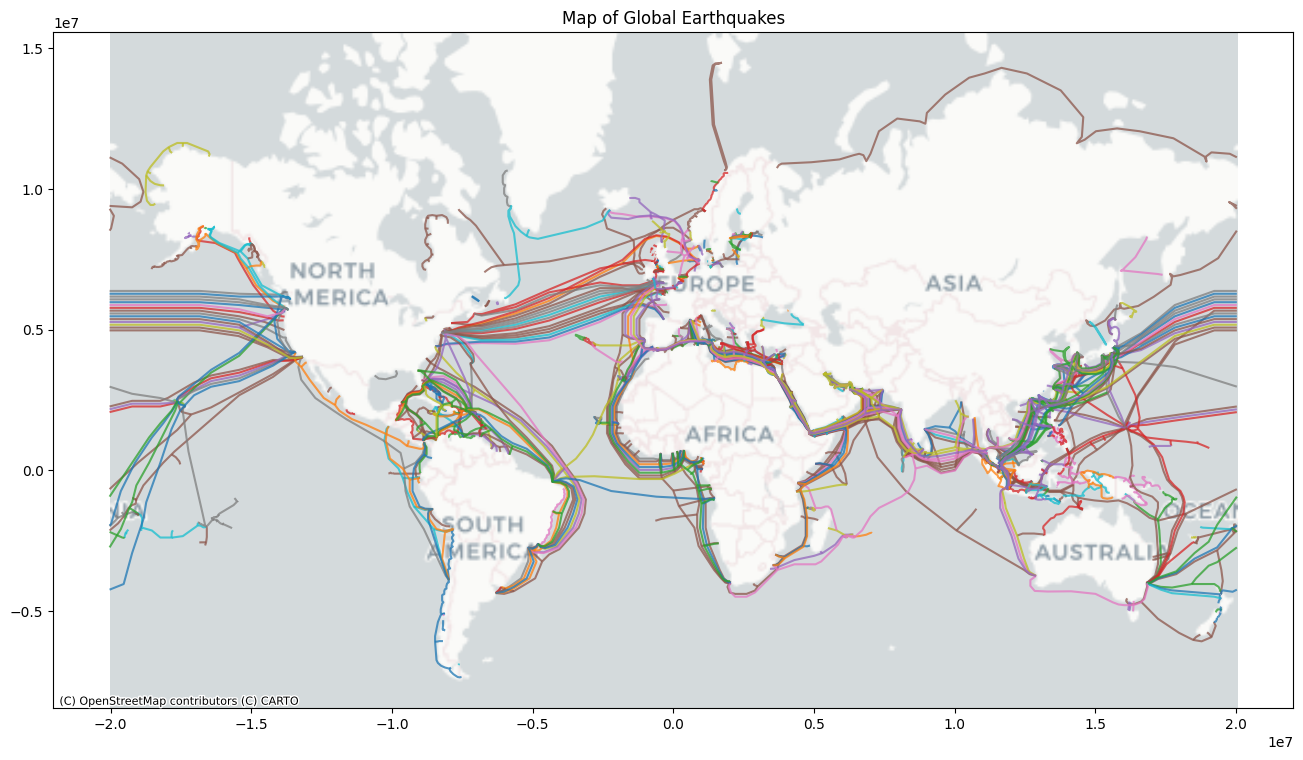

In [9]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(16, 64))
gdf_plot.plot(
    column='color', 
    ax=ax, 
    alpha=0.75,
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Global Earthquakes")

plt.show()

### Interactive Data Visualization

In [11]:
gdf.explore(
    m = folium.Map(
        location=[30.2, -1.275], 
        tiles="CartoDB Voyager", # OpenStreetMap
        zoom_start=2,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'red',
        'weight': 0.50,
        'opacity': 0.40
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': False,
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': ['ID', 'Name', 'Color', 'Feature ID']
    }
)

## Methods & Attributes

### Append Geometry Feature to GeoDataFrame

In [13]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,id,name,color,feature_id,geometry,geometry_type
0,carnival-submarine-network-1-csn-1,Carnival Submarine Network-1 (CSN-1),#939597,carnival-submarine-network-1-csn-1-0,"MULTILINESTRING ((-79.53671 8.96483, -79.42487...",MultiLineString
1,sea-h2x,SEA-H2X,#939597,sea-h2x-0,"MULTILINESTRING ((113.84999 17.10852, 116.9999...",MultiLineString
2,hronn,Hronn,#009f94,hronn-0,"MULTILINESTRING ((5.40007 55.3559, 5.28757 55....",MultiLineString
3,cook-strait,Cook Strait,#951f63,cook-strait-0,"MULTILINESTRING ((174.23597 -41.33903, 174.431...",MultiLineString
4,minoas-east-and-west,Minoas East and West,#939597,minoas-east-and-west-0,"MULTILINESTRING ((23.03575 36.52322, 23.28756 ...",MultiLineString
...,...,...,...,...,...,...
505,pgascom,PGASCOM,#7c9e3e,pgascom-0,"MULTILINESTRING ((103.70596 1.25931, 103.86558...",MultiLineString
506,boracay-palawan-submarine-cable-system,Boracay-Palawan Submarine Cable System,#2b51a3,boracay-palawan-submarine-cable-system-0,"MULTILINESTRING ((120.20077 12.00543, 120.3749...",MultiLineString
507,saudi-arabia-sudan-1-sas-1,Saudi Arabia-Sudan-1 (SAS-1),#68bc45,saudi-arabia-sudan-1-sas-1-0,"MULTILINESTRING ((37.21968 19.61557, 37.58924 ...",MultiLineString
508,falcon,FALCON,#c62026,falcon-0,"MULTILINESTRING ((43.00854 14.68566, 42.75004 ...",MultiLineString


### Some Basic Functions

In [14]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

0      False
1      False
2      False
3      False
4      False
       ...  
505    False
506    False
507    False
508    False
509    False
Length: 510, dtype: bool

### Interface

In [15]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'id': 'carnival-submarine-network-1-csn-1',
    'name': 'Carnival Submarine Network-1 (CSN-1)',
    'color': '#939597',
    'feature_id': 'carnival-submarine-network-1-csn-1-0'},
   'geometry': {'type': 'MultiLineString',
    'coordinates': (((-79.53670942010498, 8.9648260000005),
      (-79.42486949873734, 8.190543417795567),
      (-78.97486981752137, 7.298762754459602),
      (-79.1998696581294, 5.061986954416028),
      (-81.4498680642095, 2.367912558705314),
      (-82.34986742723737, 0.568578852526286),
      (-82.12486758662942, -1.981015190984778),
      (-81.44986806420931, -2.468145972656231),
      (-80.85595099012791, -2.329805834324105)),
     ((-79.87486917935743, 11.95585820711483),
      (-79.64986933934539, 12.17588718550806),
      (-78.7498699775094, 12.322472159549733),
      (-75.3748723683893, 11.441766261214156),
      (-74.7797830000003, 10.940435797483616)),
     ((-

## Save Cleaned Dataset to File

In [16]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/